# 27/2/68

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# อ่านข้อมูล (สมมติว่าเป็นไฟล์ CSV)
df = pd.read_excel("pm-data/export-114BF8ABF5AB-1h.xlsx")

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm2.5
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["pm_2_5"])
plt.title("Boxplot of PM2.5")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["pm_10"])
plt.title("Boxplot of PM10")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["humidity"])
plt.title("Boxplot of humidity")
plt.show()

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [2]:
# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df["pm_2_5"].quantile(0.25)
Q3 = df["pm_2_5"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df[(df["pm_2_5"] < lower_bound) | (df["pm_2_5"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier = outliers["pm_2_5"].min()
max_outlier = outliers["pm_2_5"].max()
# แสดงค่าต่ำสุดที่เป็น outliers
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier}")
print(f"ค่ามากสุดที่เป็น outlier: {max_outlier}")

ค่าต่ำสุดที่เป็น outlier: 42.3421052631579
ค่ามากสุดที่เป็น outlier: 156.0


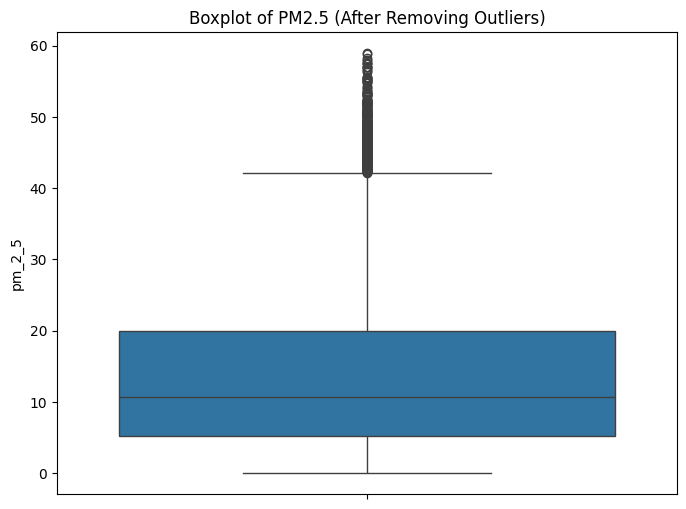

In [3]:
# ลบค่าที่มากที่สุด (outlier) ที่มีค่าเกิน 156.0
df_filtered = df[df["pm_2_5"] <= 60.0]

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติ
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered["pm_2_5"])
plt.title("Boxplot of PM2.5 (After Removing Outliers)")
plt.show()

       Unnamed: 0           timestamp      timezone   humidity      pm_10  \
574           574 2021-03-07 10:00:00  Asia/Bangkok  83.021398  14.261905   
598           598 2021-03-08 10:00:00  Asia/Bangkok  77.097621   9.935780   
917           917 2021-03-21 22:00:00  Asia/Bangkok  89.102249  44.000000   
1107         1107 2021-03-29 20:00:00  Asia/Bangkok  84.778207  31.706897   
1699         1699 2021-04-23 12:00:00  Asia/Bangkok  64.773739  32.329412   
...           ...                 ...           ...        ...        ...   
21637       21637 2024-09-01 21:00:00  Asia/Bangkok  90.345333  18.815789   
21644       21644 2024-09-02 04:00:00  Asia/Bangkok  94.233710  42.888889   
21707       21707 2024-09-04 19:00:00  Asia/Bangkok  84.745093  46.250000   
21873       21873 2024-09-11 19:00:00  Asia/Bangkok  79.138170  41.461538   
21874       21874 2024-09-11 20:00:00  Asia/Bangkok  83.953977  14.620690   

          pm_2_5  temperature  pm_2_5_diff  
574    12.297619    28.968466 

C:\Users\Saeb0m\AppData\Local\Temp\ipykernel_25732\4022681838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pm_2_5_diff'] = df_filtered['pm_2_5'].diff()


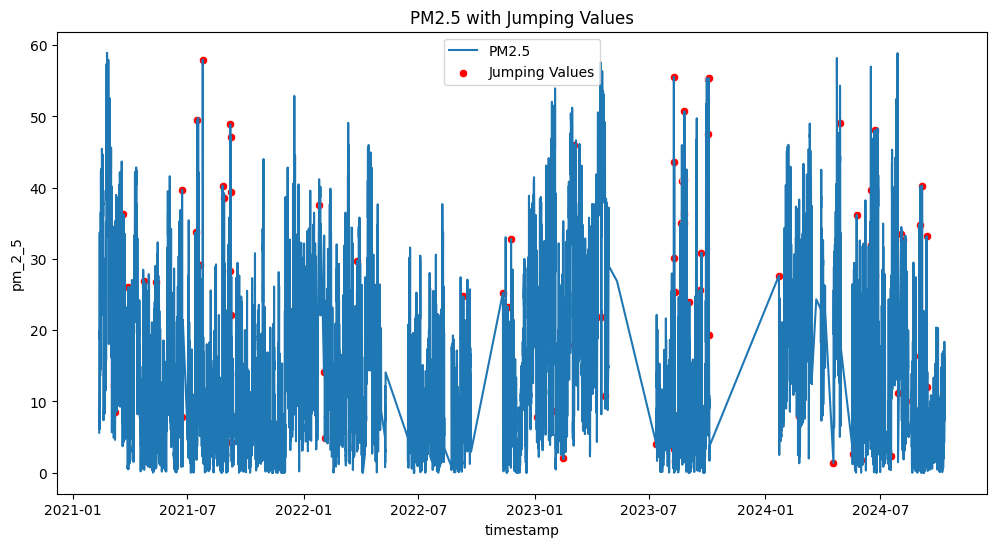

In [4]:
# สมมติว่าข้อมูลมีคอลัมน์ 'timestamp' เป็นเวลาต่อเนื่อง และ 'pm_2_5' เป็นค่า PM2.5

# คำนวณความแตกต่างระหว่างค่า PM2.5 ของแต่ละชั่วโมง
df_filtered['pm_2_5_diff'] = df_filtered['pm_2_5'].diff()

# กำหนดเกณฑ์การกระโดด (เช่น 20 µg/m³)
threshold = 20

# ตรวจสอบค่าที่มีการกระโดดมากเกินไป
jumping_values = df_filtered[df_filtered['pm_2_5_diff'].abs() > threshold]

# แสดงข้อมูลที่มีการกระโดด
print(jumping_values)

# พล็อตกราฟเพื่อดูค่าที่กระโดด
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='timestamp', y='pm_2_5', label='PM2.5')
sns.scatterplot(data=jumping_values, x='timestamp', y='pm_2_5', color='red', label='Jumping Values')
plt.title("PM2.5 with Jumping Values")
plt.show()


C:\Users\Saeb0m\AppData\Local\Temp\ipykernel_25732\1810604310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pm_2_5_diff'] = df_filtered['pm_2_5'].diff()


       Unnamed: 0           timestamp      timezone   humidity      pm_10  \
0               0 2021-02-11 12:00:00  Asia/Bangkok  74.844067   7.045977   
1               1 2021-02-11 13:00:00  Asia/Bangkok  70.873002   9.219048   
2               2 2021-02-11 14:00:00  Asia/Bangkok  70.850209   8.513514   
3               3 2021-02-11 15:00:00  Asia/Bangkok  70.122849   8.133929   
4               4 2021-02-11 16:00:00  Asia/Bangkok  73.741493   9.000000   
...           ...                 ...           ...        ...        ...   
22553       22553 2024-10-10 06:00:00  Asia/Bangkok  98.458206   8.658228   
22554       22554 2024-10-10 07:00:00  Asia/Bangkok  98.564078  10.536082   
22555       22555 2024-10-10 08:00:00  Asia/Bangkok  96.717014  17.684211   
22556       22556 2024-10-10 09:00:00  Asia/Bangkok  88.614260  14.912281   
22557       22557 2024-10-10 10:00:00  Asia/Bangkok  84.640717  12.857143   

          pm_2_5  temperature  pm_2_5_diff  
0       5.620690    29.962665 

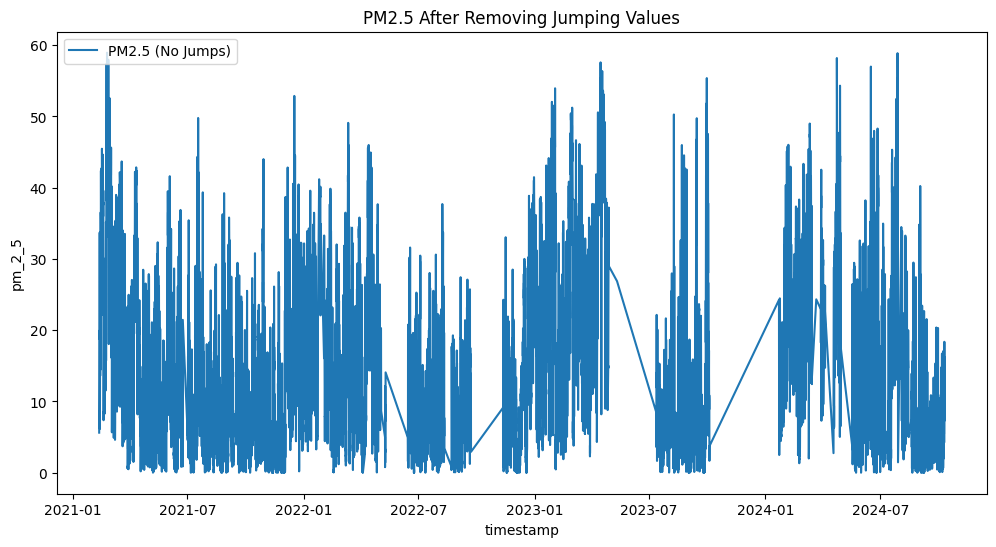

In [5]:
# สมมติว่าข้อมูลมีคอลัมน์ 'timestamp' เป็นเวลาต่อเนื่อง และ 'pm_2_5' เป็นค่า PM2.5

# คำนวณความแตกต่างระหว่างค่า PM2.5 ของแต่ละชั่วโมง
df_filtered['pm_2_5_diff'] = df_filtered['pm_2_5'].diff()

# กำหนดเกณฑ์การกระโดด (เช่น 20 µg/m³)
threshold = 20

# ตรวจสอบค่าที่มีการกระโดดมากเกินไป
jumping_values = df_filtered[df_filtered['pm_2_5_diff'].abs() > threshold]

# ลบแถวที่มีการกระโดดออก
df_no_jumps = df_filtered[~df_filtered.index.isin(jumping_values.index)]

# แสดงผลข้อมูลที่ลบค่ากระโดดออก
print(df_no_jumps)

# พล็อตกราฟเพื่อดูค่าที่กระโดดออก
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_no_jumps, x='timestamp', y='pm_2_5', label='PM2.5 (No Jumps)')
plt.title("PM2.5 After Removing Jumping Values")
plt.show()


In [6]:
df_no_jumps.columns

Index(['Unnamed: 0', 'timestamp', 'timezone', 'humidity', 'pm_10', 'pm_2_5',
       'temperature', 'pm_2_5_diff'],
      dtype='object')

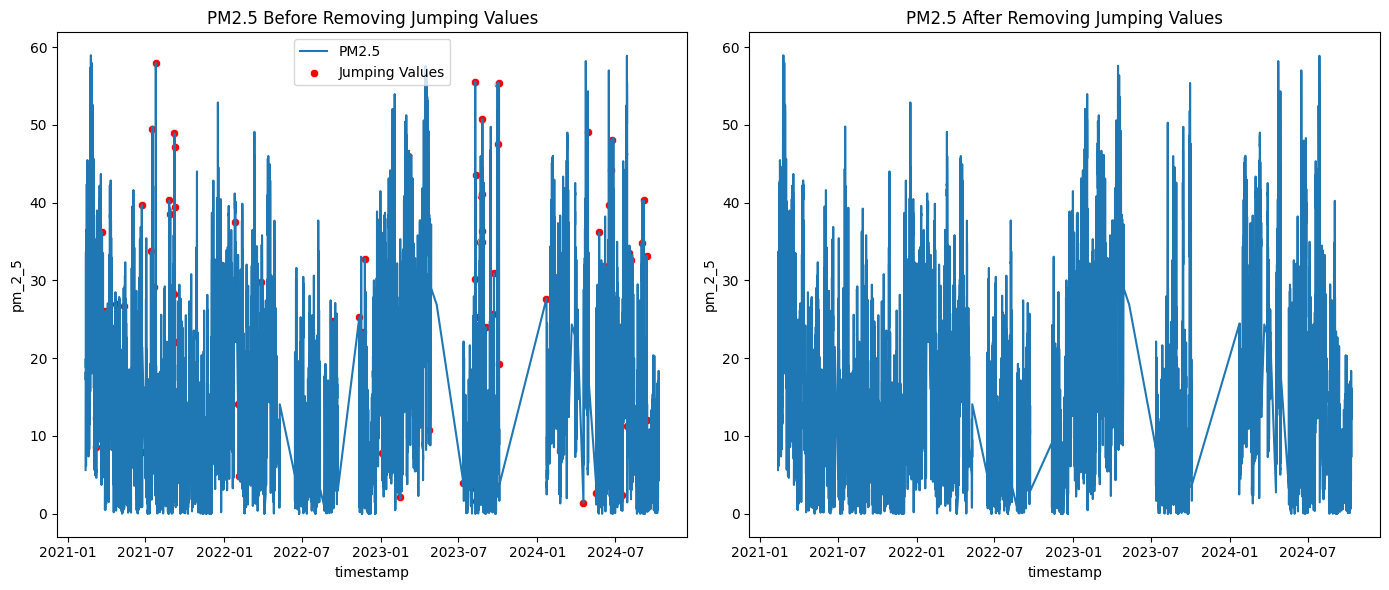

In [7]:
# พล็อตกราฟสองภาพข้างๆ เพื่อเปรียบเทียบ
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# พล็อตกราฟเพื่อดูค่าที่กระโดด (ก่อนลบค่ากระโดด)
sns.lineplot(data=df_filtered, x='timestamp', y='pm_2_5', label='PM2.5', ax=axes[0])
sns.scatterplot(data=jumping_values, x='timestamp', y='pm_2_5', color='red', label='Jumping Values', ax=axes[0])
axes[0].set_title("PM2.5 Before Removing Jumping Values")

# พล็อตกราฟที่สอง (หลังลบค่ากระโดด)
sns.lineplot(data=df_no_jumps, x='timestamp', y='pm_2_5', ax=axes[1])
axes[1].set_title("PM2.5 After Removing Jumping Values")

# แสดงกราฟ
plt.tight_layout()
plt.show()


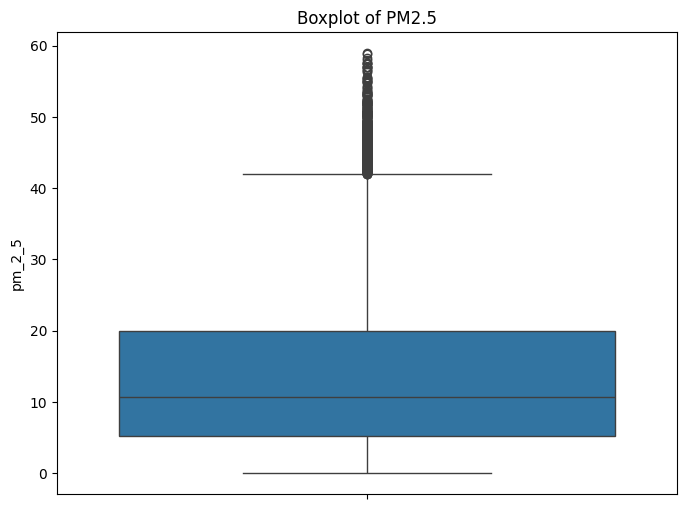

In [8]:
# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm2.5
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_no_jumps["pm_2_5"])
plt.title("Boxplot of PM2.5")
plt.show()

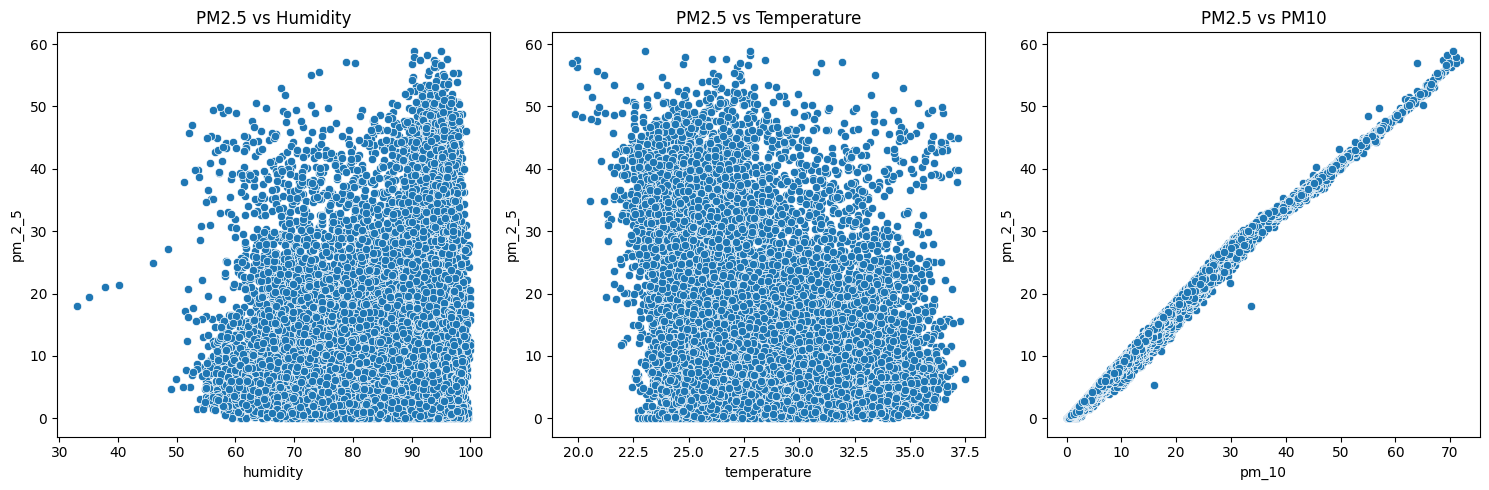

In [9]:
# พล็อต scatter plot เพื่อดูความสัมพันธ์ของ pm2.5 กับตัวแปรอื่น ๆ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df_no_jumps["humidity"], y=df_no_jumps["pm_2_5"], ax=axes[0])
axes[0].set_title("PM2.5 vs Humidity")

sns.scatterplot(x=df_no_jumps["temperature"], y=df_no_jumps["pm_2_5"], ax=axes[1])
axes[1].set_title("PM2.5 vs Temperature")

sns.scatterplot(x=df_no_jumps["pm_10"], y=df_no_jumps["pm_2_5"], ax=axes[2])
axes[2].set_title("PM2.5 vs PM10")

plt.tight_layout()
plt.show()

# 28/2/2568

## PM2.5

### กรองค่ากระโดดในชั่วโมงถัดไปและลดลง

In [10]:
# คำนวณความแตกต่างระหว่างชั่วโมงก่อนหน้า
df['pm_2_5_diff'] = df['pm_2_5'].diff()

# กำหนด threshold สำหรับการกระโดด (เช่น 20)
threshold = 20

# หาข้อมูลที่กระโดดขึ้นหรือลงเกิน threshold
jumping_indices = df.index[(df['pm_2_5_diff'].abs() > threshold)]

# ตรวจสอบว่าค่าหลังจากกระโดด "ลดลงทันที" หรือไม่
to_remove = []
for idx in jumping_indices:
    if idx + 1 in df.index:  # ตรวจสอบว่ามีค่าถัดไปหรือไม่
        if df.loc[idx + 1, 'pm_2_5'] < df.loc[idx, 'pm_2_5']:  # ถ้าค่าถัดไปลดลง ให้ลบ
            to_remove.append(idx)

# ลบเฉพาะแถวที่ค่ากระโดดแล้วลดลงทันที
df_filtered = df.drop(index=to_remove)

# แสดงผลข้อมูลหลังกรอง
print(df_filtered)


       Unnamed: 0           timestamp      timezone   humidity      pm_10  \
0               0 2021-02-11 12:00:00  Asia/Bangkok  74.844067   7.045977   
1               1 2021-02-11 13:00:00  Asia/Bangkok  70.873002   9.219048   
2               2 2021-02-11 14:00:00  Asia/Bangkok  70.850209   8.513514   
3               3 2021-02-11 15:00:00  Asia/Bangkok  70.122849   8.133929   
4               4 2021-02-11 16:00:00  Asia/Bangkok  73.741493   9.000000   
...           ...                 ...           ...        ...        ...   
22553       22553 2024-10-10 06:00:00  Asia/Bangkok  98.458206   8.658228   
22554       22554 2024-10-10 07:00:00  Asia/Bangkok  98.564078  10.536082   
22555       22555 2024-10-10 08:00:00  Asia/Bangkok  96.717014  17.684211   
22556       22556 2024-10-10 09:00:00  Asia/Bangkok  88.614260  14.912281   
22557       22557 2024-10-10 10:00:00  Asia/Bangkok  84.640717  12.857143   

          pm_2_5  temperature  pm_2_5_diff  
0       5.620690    29.962665 

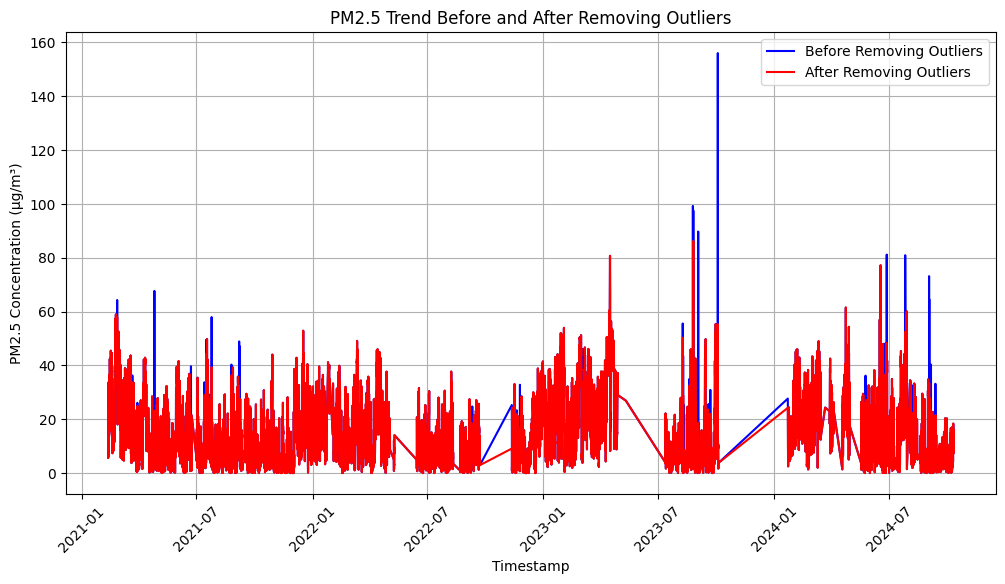

In [11]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))

# พล็อตค่าก่อนลบค่าผิดปกติ
sns.lineplot(data=df, x='timestamp', y='pm_2_5', label='Before Removing Outliers', color='blue')

# พล็อตค่าหลังลบค่าผิดปกติ
sns.lineplot(data=df_filtered, x='timestamp', y='pm_2_5', label='After Removing Outliers', color='red')

# ตกแต่งกราฟ
plt.xlabel("Timestamp")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.title("PM2.5 Trend Before and After Removing Outliers")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# แสดงผล
plt.show()


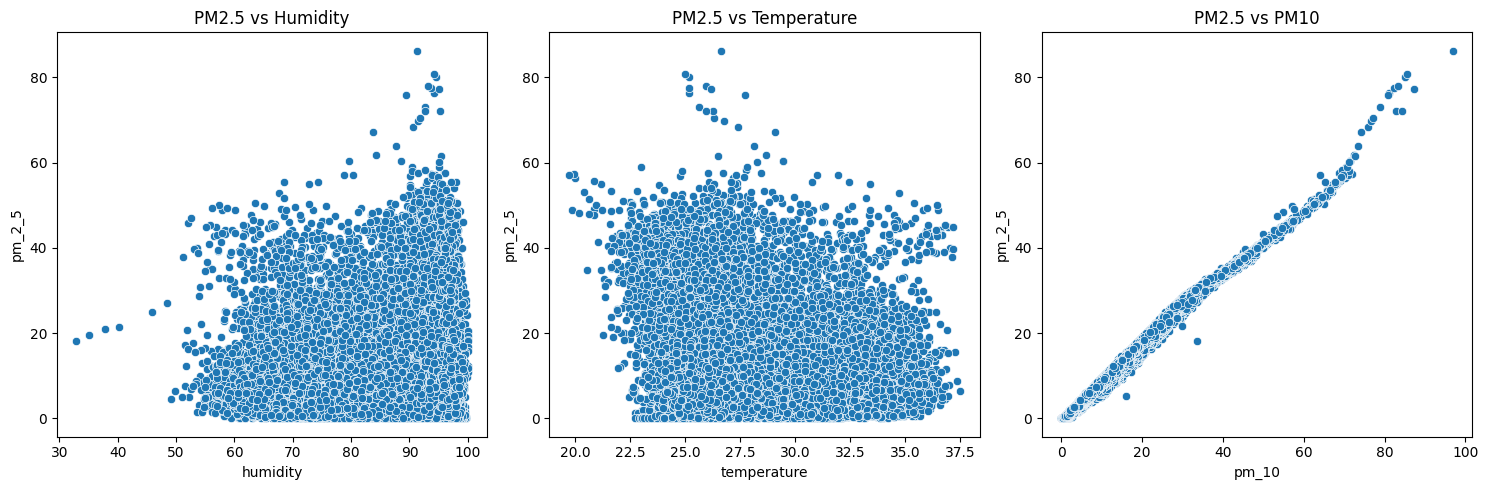

In [12]:
# พล็อต scatter plot เพื่อดูความสัมพันธ์ของ pm2.5 กับตัวแปรอื่น ๆ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df_filtered["humidity"], y=df_filtered["pm_2_5"], ax=axes[0])
axes[0].set_title("PM2.5 vs Humidity")

sns.scatterplot(x=df_filtered["temperature"], y=df_filtered["pm_2_5"], ax=axes[1])
axes[1].set_title("PM2.5 vs Temperature")

sns.scatterplot(x=df_filtered["pm_10"], y=df_filtered["pm_2_5"], ax=axes[2])
axes[2].set_title("PM2.5 vs PM10")

plt.tight_layout()
plt.show()

### กรองค่า oulier ที่มากกว่า 60 ก่อน

In [13]:
# ลบค่าที่มากที่สุด (outlier) ที่มีค่าเกิน 156.0
df_filtered_60 = df_filtered[df_filtered["pm_2_5"] <= 60.0]


In [14]:
# # พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติ
# plt.figure(figsize=(8, 6))
# sns.boxplot(y=df_filtered_60["pm_2_5"])
# plt.title("Boxplot of PM2.5 (After Removing Outliers)")
# plt.show()

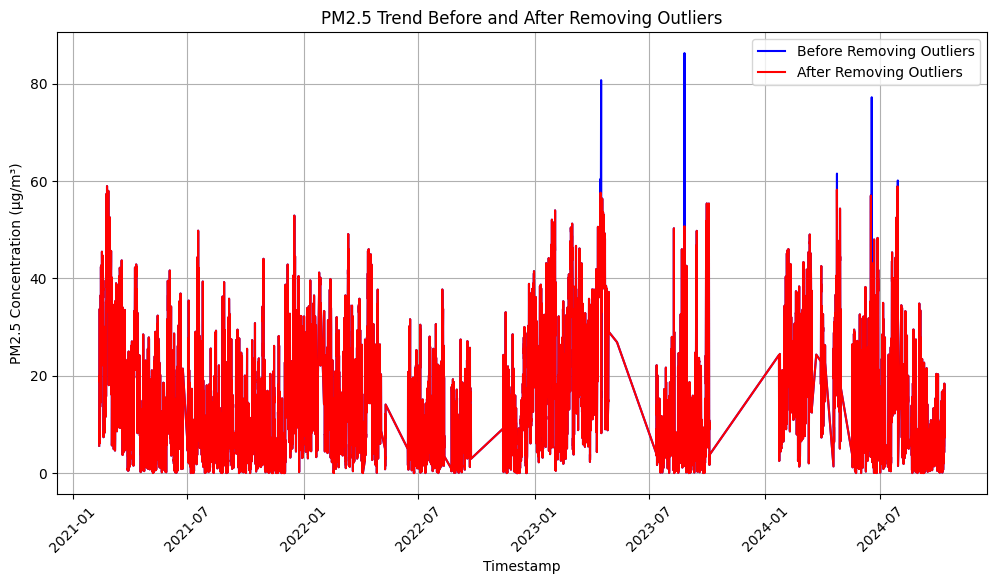

In [15]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))

# พล็อตค่าก่อนลบค่าผิดปกติ
sns.lineplot(data=df_filtered, x='timestamp', y='pm_2_5', label='Before Removing Outliers', color='blue')

# พล็อตค่าหลังลบค่าผิดปกติ
sns.lineplot(data=df_filtered_60, x='timestamp', y='pm_2_5', label='After Removing Outliers', color='red')

# ตกแต่งกราฟ
plt.xlabel("Timestamp")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.title("PM2.5 Trend Before and After Removing Outliers")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# แสดงผล
plt.show()

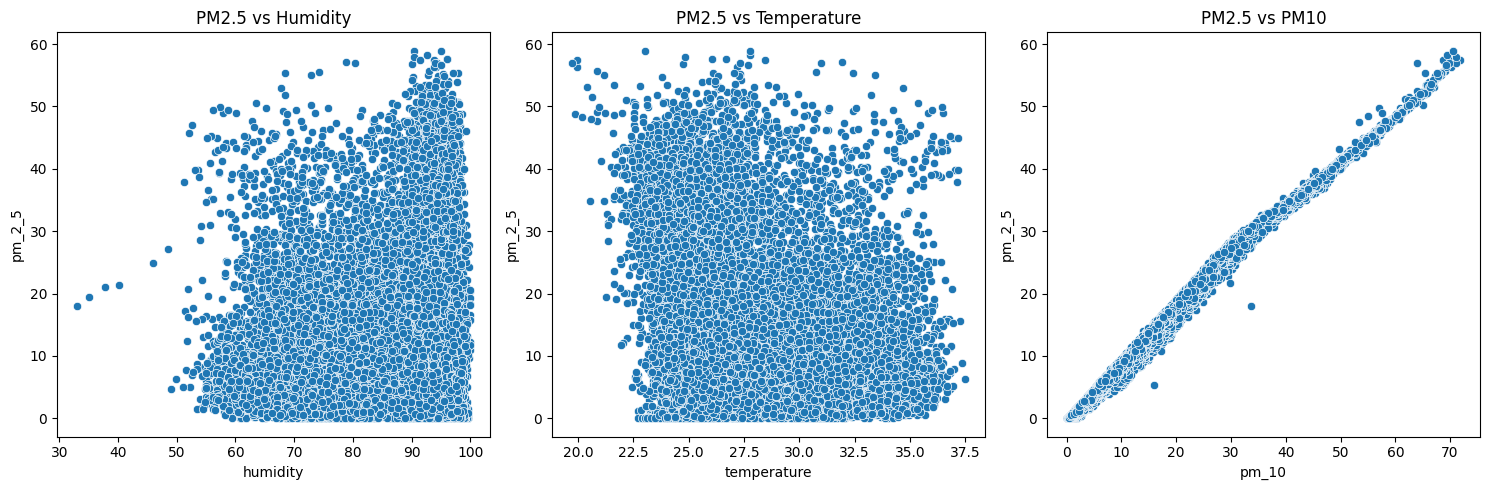

In [16]:
# พล็อต scatter plot เพื่อดูความสัมพันธ์ของ pm2.5 กับตัวแปรอื่น ๆ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df_filtered_60["humidity"], y=df_filtered_60["pm_2_5"], ax=axes[0])
axes[0].set_title("PM2.5 vs Humidity")

sns.scatterplot(x=df_filtered_60["temperature"], y=df_filtered_60["pm_2_5"], ax=axes[1])
axes[1].set_title("PM2.5 vs Temperature")

sns.scatterplot(x=df_filtered_60["pm_10"], y=df_filtered_60["pm_2_5"], ax=axes[2])
axes[2].set_title("PM2.5 vs PM10")

plt.tight_layout()
plt.show()

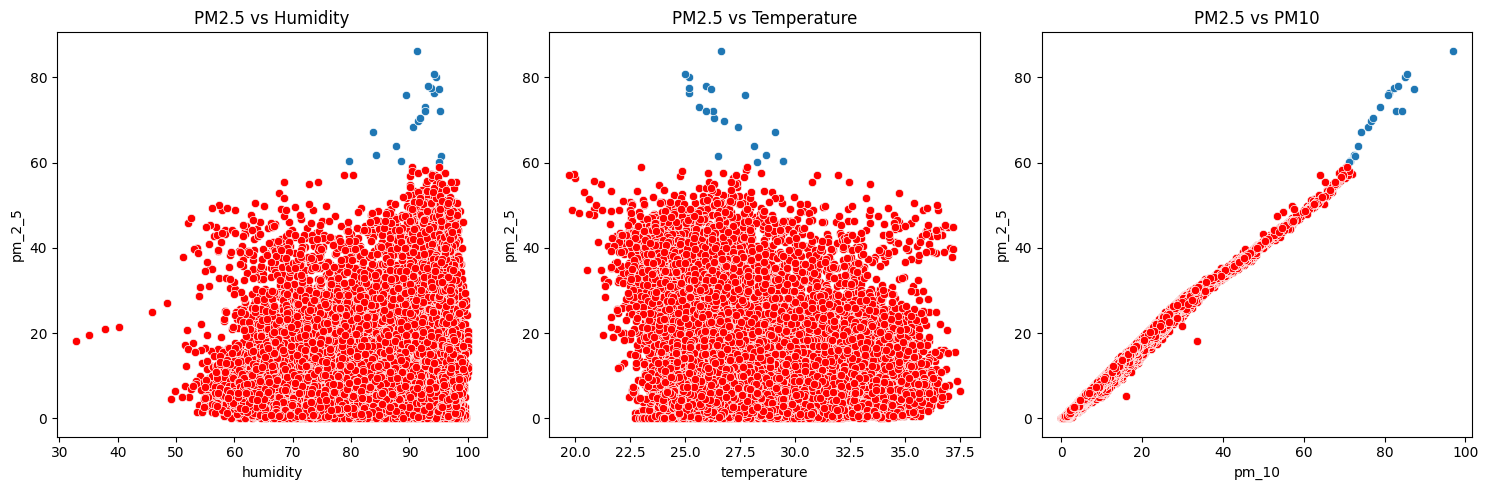

In [17]:
# พล็อต scatter plot เพื่อดูความสัมพันธ์ของ pm2.5 กับตัวแปรอื่น ๆ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df_filtered["humidity"], y=df_filtered["pm_2_5"], ax=axes[0])
sns.scatterplot(x=df_filtered_60["humidity"], y=df_filtered_60["pm_2_5"], ax=axes[0], color='red')
axes[0].set_title("PM2.5 vs Humidity")

sns.scatterplot(x=df_filtered["temperature"], y=df_filtered["pm_2_5"], ax=axes[1])
sns.scatterplot(x=df_filtered_60["temperature"], y=df_filtered_60["pm_2_5"], ax=axes[1], color='red')
axes[1].set_title("PM2.5 vs Temperature")

sns.scatterplot(x=df_filtered["pm_10"], y=df_filtered["pm_2_5"], ax=axes[2])
sns.scatterplot(x=df_filtered_60["pm_10"], y=df_filtered_60["pm_2_5"], ax=axes[2], color='red')
axes[2].set_title("PM2.5 vs PM10")

plt.tight_layout()
plt.show()

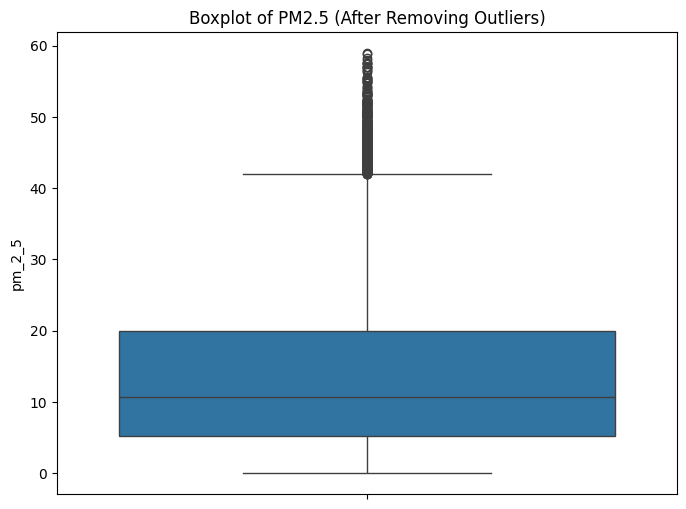

In [18]:
# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติ
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered_60["pm_2_5"])
plt.title("Boxplot of PM2.5 (After Removing Outliers)")
plt.show()

--> PM2.5 = df_filtered_60

## PM10

### Data Visualize

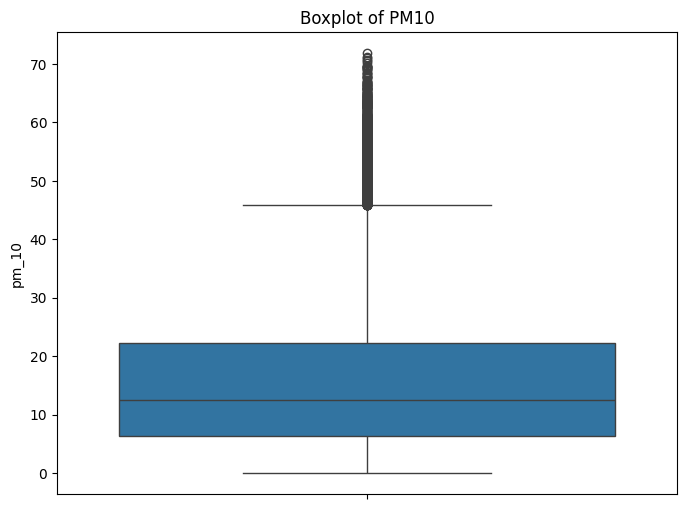

In [19]:
# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติ
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered_60["pm_10"])
plt.title("Boxplot of PM10")
plt.show()

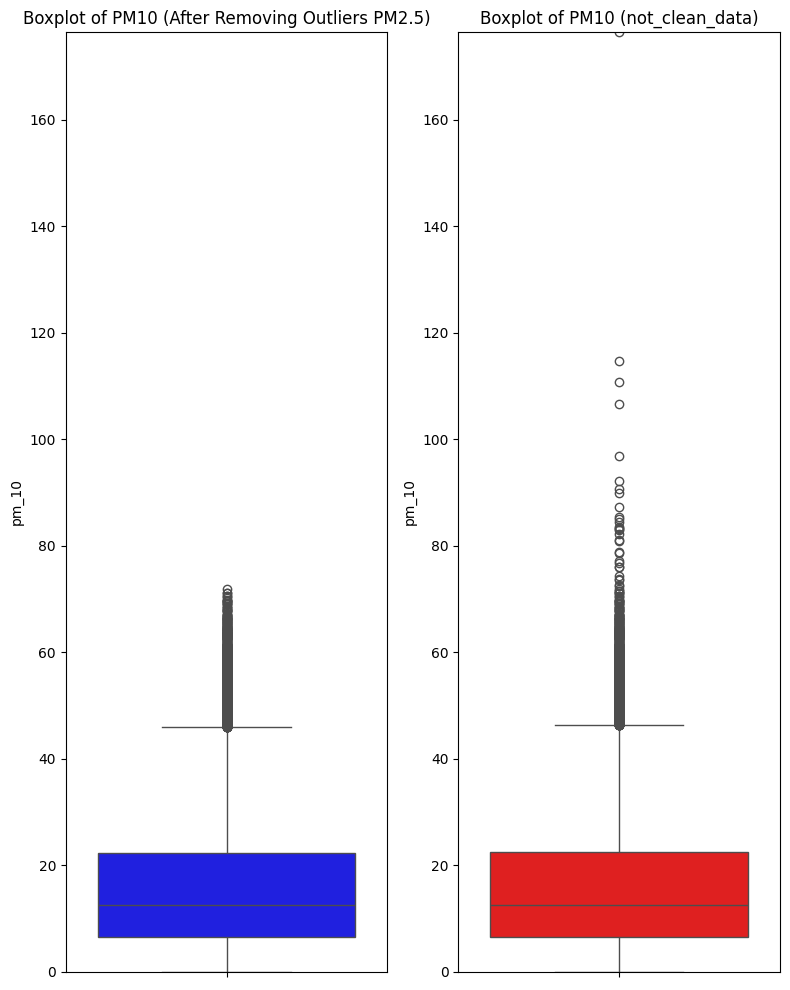

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 10))  # 2 แถว, 1 คอลัมน์

y_min = min(df_filtered_60["pm_10"].min(), df["pm_10"].min())
y_max = max(df_filtered_60["pm_10"].max(), df["pm_10"].max())

# Boxplot PM10
sns.boxplot(y=df_filtered_60["pm_10"], ax=axes[0], color="blue")
axes[0].set_title("Boxplot of PM10 (After Removing Outliers PM2.5)")
axes[0].set_ylim(y_min, y_max)  # กำหนดขอบเขตของแกน y

# Boxplot PM2.5
sns.boxplot(y=df["pm_10"], ax=axes[1], color="red")
axes[1].set_title("Boxplot of PM10 (not_clean_data)")
axes[1].set_ylim(y_min, y_max)  # กำหนดขอบเขตของแกน y

plt.tight_layout()  # จัดให้ไม่ทับกัน
plt.show()

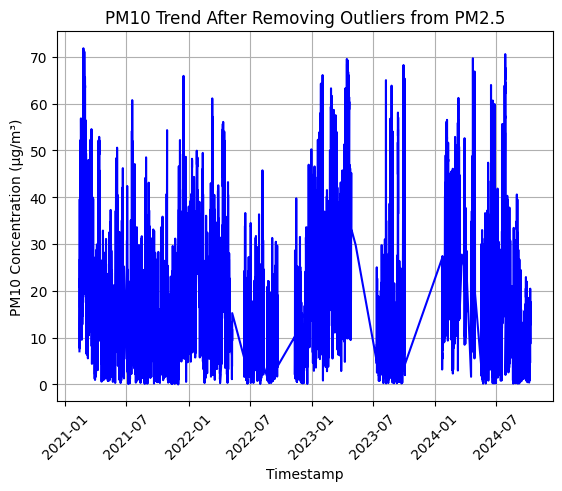

In [21]:
sns.lineplot(data=df_filtered_60, x='timestamp', y='pm_10', color='blue')

# ตกแต่งกราฟ
plt.xlabel("Timestamp")
plt.ylabel("PM10 Concentration (µg/m³)")
plt.title("PM10 Trend After Removing Outliers from PM2.5")
plt.xticks(rotation=45)
plt.grid(True)

# แสดงผล
plt.show()

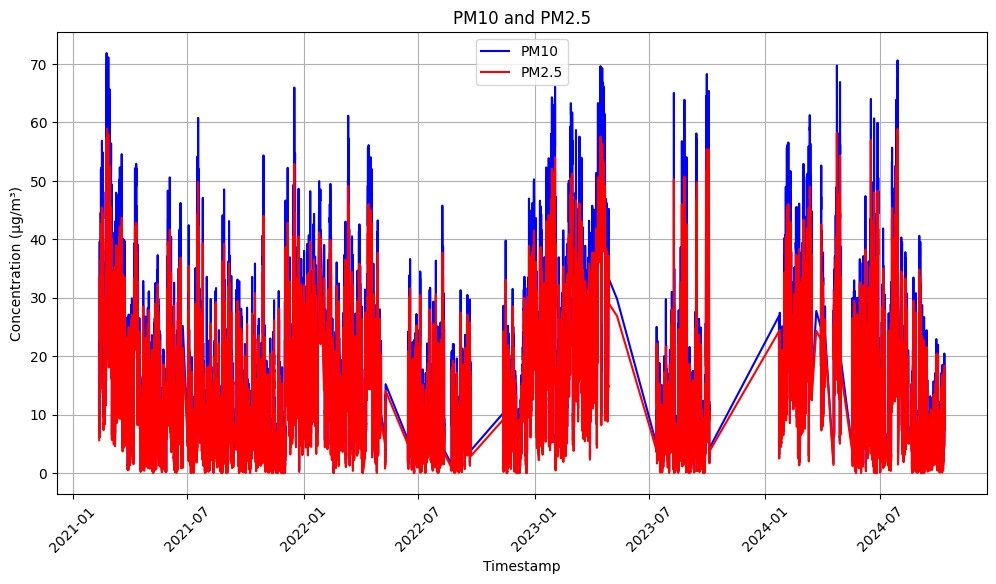

In [22]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))

# พล็อตค่าก่อนลบค่าผิดปกติ
sns.lineplot(data=df_filtered_60, x='timestamp', y='pm_10', label='PM10', color='blue')

# พล็อตค่าหลังลบค่าผิดปกติ
sns.lineplot(data=df_filtered_60, x='timestamp', y='pm_2_5', label='PM2.5', color='red')

# ตกแต่งกราฟ
plt.xlabel("Timestamp")
plt.ylabel("Concentration (µg/m³)")
plt.title("PM10 and PM2.5")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# แสดงผล
plt.show()

### กรองค่ากระโดดในชั่วโมงถัดไปและลดลง (PM10)

In [23]:
df_filtered_60.columns

Index(['Unnamed: 0', 'timestamp', 'timezone', 'humidity', 'pm_10', 'pm_2_5',
       'temperature', 'pm_2_5_diff'],
      dtype='object')

1 ชม. check

In [24]:
# คำนวณความแตกต่างระหว่างชั่วโมงก่อนหน้า
df_filtered_60['pm_10_diff'] = df_filtered_60['pm_10'].diff()

# กำหนด threshold สำหรับการกระโดด (เช่น 20)
threshold = 20

# หาข้อมูลที่กระโดดขึ้นหรือลงเกิน threshold
jumping_indices = df_filtered_60.index[(df_filtered_60['pm_10_diff'].abs() > threshold)]

# ตรวจสอบว่าค่าหลังจากกระโดด "ลดลงทันที" หรือไม่
to_remove = []
for idx in jumping_indices:
    if idx + 1 in df_filtered_60.index:  # ตรวจสอบว่ามีค่าถัดไปหรือไม่
        if df_filtered_60.loc[idx + 1, 'pm_10'] < df_filtered_60.loc[idx, 'pm_10']:  # ถ้าค่าถัดไปลดลง ให้ลบ
            to_remove.append(idx)

# ลบเฉพาะแถวที่ค่ากระโดดแล้วลดลงทันที
df_filtered_jump_pm10 = df_filtered_60.drop(index=to_remove)


C:\Users\Saeb0m\AppData\Local\Temp\ipykernel_25732\642146942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_60['pm_10_diff'] = df_filtered_60['pm_10'].diff()


In [25]:
df_filtered_60.shape

(22449, 9)

In [26]:
df_filtered_jump_pm10.shape

(22385, 9)

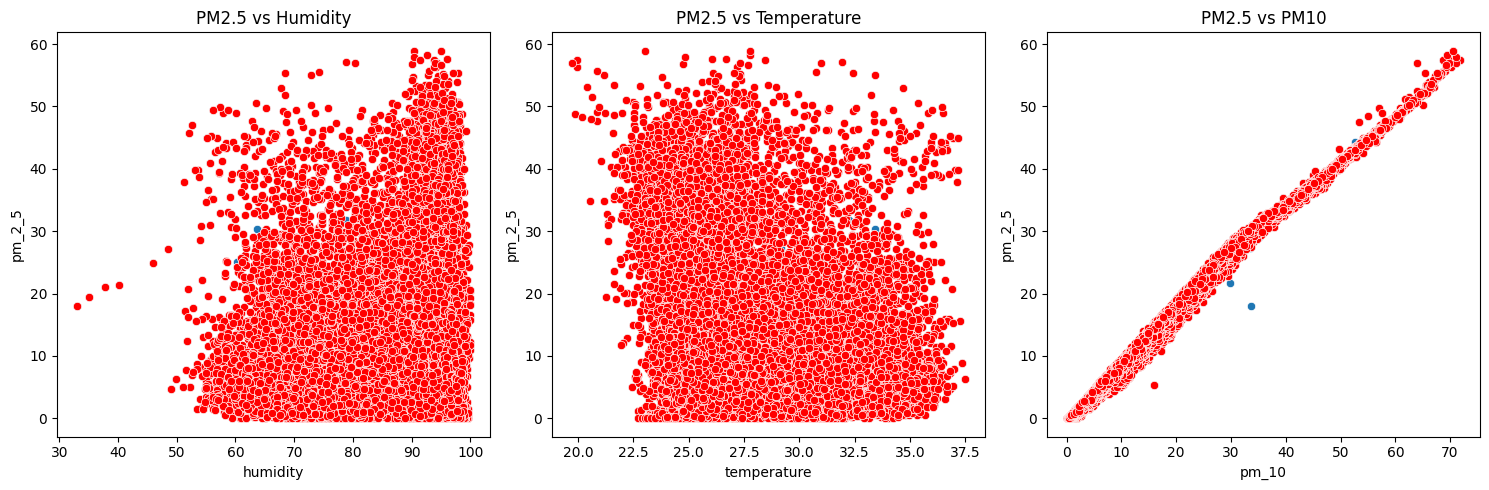

In [27]:
# พล็อต scatter plot เพื่อดูความสัมพันธ์ของ pm2.5 กับตัวแปรอื่น ๆ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df_filtered_60["humidity"], y=df_filtered_60["pm_2_5"], ax=axes[0])
sns.scatterplot(x=df_filtered_jump_pm10["humidity"], y=df_filtered_jump_pm10["pm_2_5"], ax=axes[0], color='red')
axes[0].set_title("PM2.5 vs Humidity")

sns.scatterplot(x=df_filtered_60["temperature"], y=df_filtered_60["pm_2_5"], ax=axes[1])
sns.scatterplot(x=df_filtered_jump_pm10["temperature"], y=df_filtered_jump_pm10["pm_2_5"], ax=axes[1], color='red')
axes[1].set_title("PM2.5 vs Temperature")

sns.scatterplot(x=df_filtered_60["pm_10"], y=df_filtered_60["pm_2_5"], ax=axes[2])
sns.scatterplot(x=df_filtered_jump_pm10["pm_10"], y=df_filtered_jump_pm10["pm_2_5"], ax=axes[2], color='red')
axes[2].set_title("PM2.5 vs PM10")

plt.tight_layout()
plt.show()

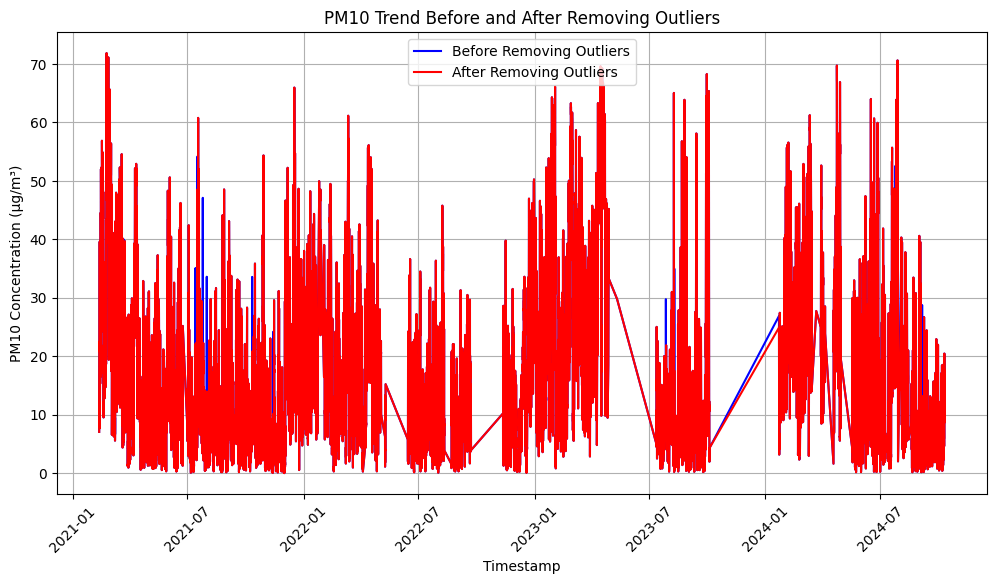

In [28]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))

# พล็อตค่าก่อนลบค่าผิดปกติ
sns.lineplot(data=df_filtered_60, x='timestamp', y='pm_10', label='Before Removing Outliers', color='blue')

# พล็อตค่าหลังลบค่าผิดปกติ
sns.lineplot(data=df_filtered_jump_pm10, x='timestamp', y='pm_10', label='After Removing Outliers', color='red')

# ตกแต่งกราฟ
plt.xlabel("Timestamp")
plt.ylabel("PM10 Concentration (µg/m³)")
plt.title("PM10 Trend Before and After Removing Outliers")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# แสดงผล
plt.show()

--> df_filtered_jump_pm10

# Humidity

## Data Visualize

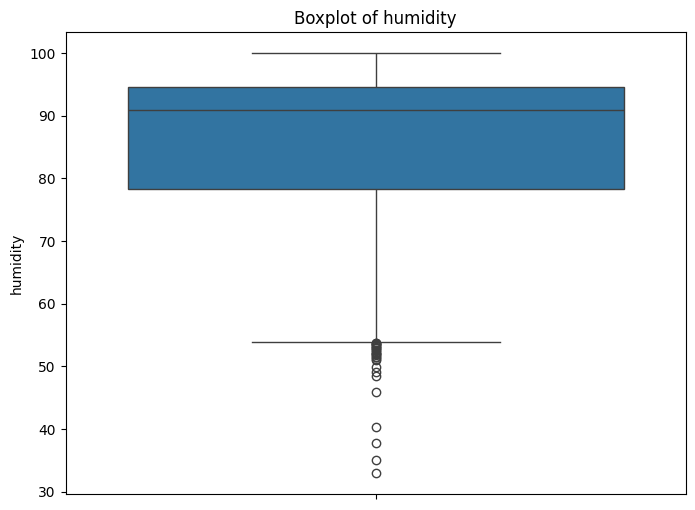

In [29]:
# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติ
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered_jump_pm10["humidity"])
plt.title("Boxplot of humidity")
plt.show()

In [31]:
# กรองแถวที่ค่า humidity ต่ำกว่า 55
filtered_data = df_filtered_jump_pm10[df_filtered_jump_pm10["humidity"] < 55]

# แสดงข้อมูลที่กรองออกมา
print(filtered_data)

# แสดงข้อมูลที่เกี่ยวข้องกับแถวที่มีค่าความชื้นต่ำกว่า 55
# เช็คแนวโน้มในช่วงเวลาใกล้เคียง
print(df_filtered_jump_pm10[df_filtered_jump_pm10.index.isin(filtered_data.index - 1)])
print(df_filtered_jump_pm10[df_filtered_jump_pm10.index.isin(filtered_data.index + 1)])


       Unnamed: 0           timestamp      timezone   humidity      pm_10  \
268           268 2021-02-22 16:00:00  Asia/Bangkok  54.983292  41.761905   
360           360 2021-02-26 12:00:00  Asia/Bangkok  48.504327  28.844660   
361           361 2021-02-26 13:00:00  Asia/Bangkok  40.251237  23.000000   
362           362 2021-02-26 14:00:00  Asia/Bangkok  37.754458  22.504348   
363           363 2021-02-26 15:00:00  Asia/Bangkok  35.004223  20.793103   
364           364 2021-02-26 16:00:00  Asia/Bangkok  32.942947  19.373913   
385           385 2021-02-27 13:00:00  Asia/Bangkok  53.947037  31.329670   
386           386 2021-02-27 14:00:00  Asia/Bangkok  45.956091  26.443478   
387           387 2021-02-27 15:00:00  Asia/Bangkok  54.181202  34.662791   
837           837 2021-03-18 14:00:00  Asia/Bangkok  51.463074  18.797753   
838           838 2021-03-18 15:00:00  Asia/Bangkok  52.835255  19.205607   
1125         1125 2021-03-30 14:00:00  Asia/Bangkok  54.943023   3.505495   

ข้อมูลที่ humidity อยู่ในช่วง 40-60:
       Unnamed: 0           timestamp      timezone   humidity      pm_10  \
264           264 2021-02-22 12:00:00  Asia/Bangkok  59.203677  34.803571   
265           265 2021-02-22 13:00:00  Asia/Bangkok  57.423430  38.290000   
266           266 2021-02-22 14:00:00  Asia/Bangkok  55.761840  41.956989   
267           267 2021-02-22 15:00:00  Asia/Bangkok  56.100514  42.226087   
268           268 2021-02-22 16:00:00  Asia/Bangkok  54.983292  41.761905   
...           ...                 ...           ...        ...        ...   
20391       20391 2024-06-28 14:00:00  Asia/Bangkok  59.215350   6.296703   
20949       20949 2024-07-25 15:00:00  Asia/Bangkok  58.490294  14.870690   
21366       21366 2024-08-21 14:00:00  Asia/Bangkok  59.326201   4.724138   
21581       21581 2024-08-30 13:00:00  Asia/Bangkok  59.774326   4.084034   
21582       21582 2024-08-30 14:00:00  Asia/Bangkok  58.973604   5.327586   

          pm_2_5  temperature  pm_2_5_

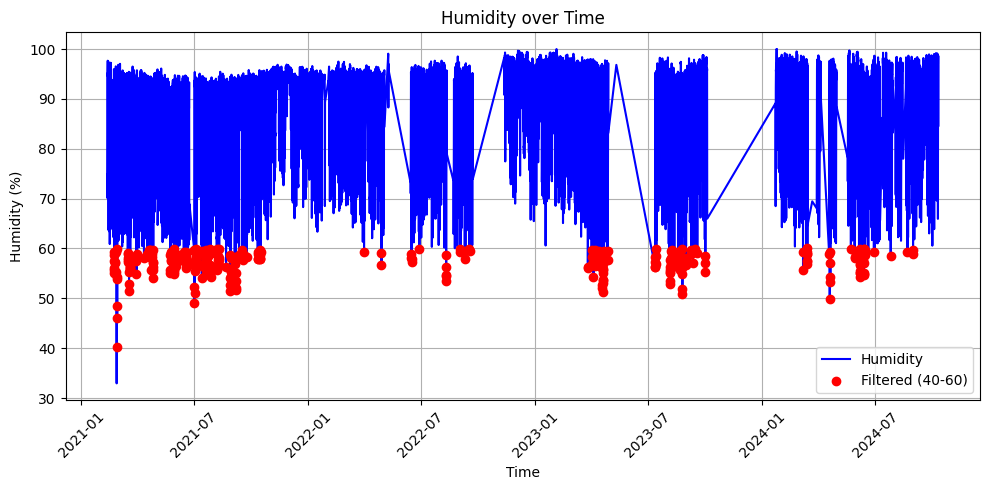

In [30]:
# กรองค่าที่ humidity อยู่ในช่วง 40-60
df_humi = df[(df['humidity'] >= 40) & (df['humidity'] <= 60)]

# แสดงผล
print("ข้อมูลที่ humidity อยู่ในช่วง 40-60:")
print(df_humi)

# แสดงกราฟ
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['humidity'], label='Humidity', color='blue')
plt.scatter(df_humi['timestamp'], df_humi['humidity'], color='red', label='Filtered (40-60)', zorder=5)

plt.title('Humidity over Time')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### กรองข้อมูล Outliner 

In [42]:
# กรองข้อมูลที่ค่า humidity ต่ำกว่า 60
df_humi_60 = df_filtered_jump_pm10[df_filtered_jump_pm10["humidity"] >= 57]


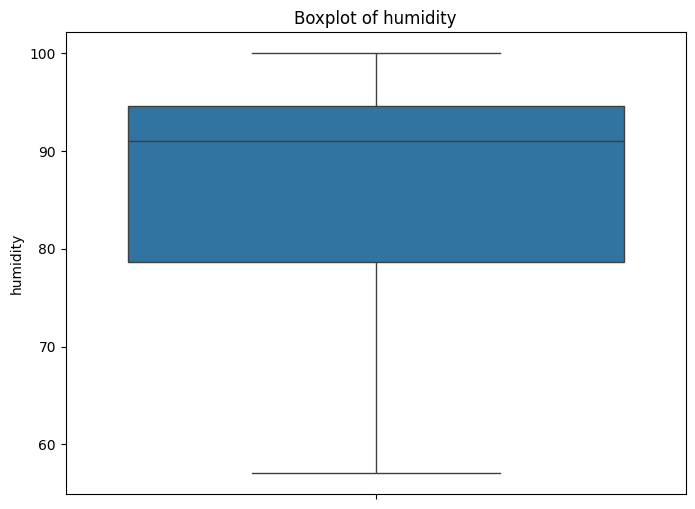

In [43]:
# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติ
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_humi_60["humidity"])
plt.title("Boxplot of humidity")
plt.show()

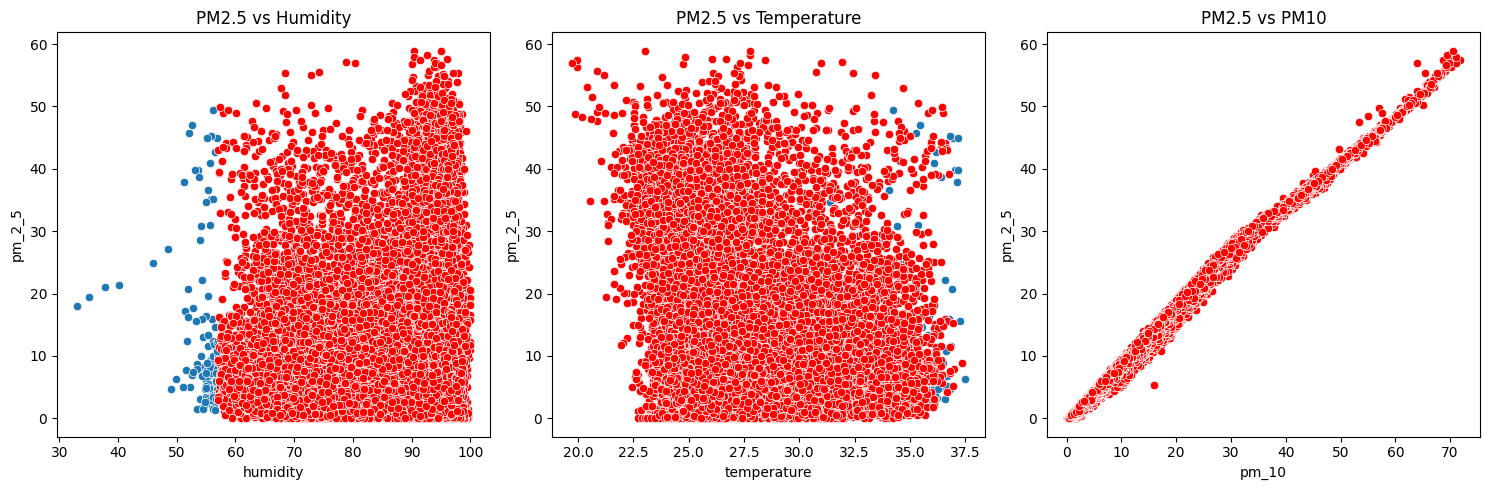

In [44]:
# พล็อต scatter plot เพื่อดูความสัมพันธ์ของ pm2.5 กับตัวแปรอื่น ๆ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df_filtered_jump_pm10["humidity"], y=df_filtered_jump_pm10["pm_2_5"], ax=axes[0])
sns.scatterplot(x=df_humi_60["humidity"], y=df_humi_60["pm_2_5"], ax=axes[0], color='red')
axes[0].set_title("PM2.5 vs Humidity")

sns.scatterplot(x=df_filtered_jump_pm10["temperature"], y=df_filtered_jump_pm10["pm_2_5"], ax=axes[1])
sns.scatterplot(x=df_humi_60["temperature"], y=df_humi_60["pm_2_5"], ax=axes[1], color='red')
axes[1].set_title("PM2.5 vs Temperature")

sns.scatterplot(x=df_filtered_jump_pm10["pm_10"], y=df_filtered_jump_pm10["pm_2_5"], ax=axes[2])
sns.scatterplot(x=df_humi_60["pm_10"], y=df_humi_60["pm_2_5"], ax=axes[2], color='red')
axes[2].set_title("PM2.5 vs PM10")

plt.tight_layout()
plt.show()

In [67]:
df_humi_60.shape

(22255, 7)

In [68]:
df.shape

(22558, 8)

In [65]:
df_humi_60.columns

Index(['Unnamed: 0', 'timestamp', 'timezone', 'humidity', 'pm_10', 'pm_2_5',
       'temperature'],
      dtype='object')

In [64]:
df_humi_60.drop(columns=['pm_2_5_diff', 'pm_10_diff'], inplace=True)

C:\Users\Saeb0m\AppData\Local\Temp\ipykernel_25732\3260891548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_humi_60.drop(columns=['pm_2_5_diff', 'pm_10_diff'], inplace=True)


In [66]:
# กำหนดชื่อไฟล์ที่ต้องการบันทึก
filename = 'export_data/filtered_data_1.csv'

# บันทึก DataFrame เป็นไฟล์ CSV
df_humi_60.to_csv(filename, index=False)

print(f"ไฟล์ CSV ถูกบันทึกที่ {filename}")

ไฟล์ CSV ถูกบันทึกที่ export_data/filtered_data_1.csv


In [ ]:
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
exp1.setup(data, target='charges', session_id=123)